# The SPE9 model
[Killough, J. E. 1995. Ninth SPE comparative solution project: A reexamination
of black-oil simulation. In SPE Reservoir Simulation Symposium,  12-15
February 1995, San Antonio, Texas. SPE 29110-MS]
(http://dx.doi.org/10.2118/29110-MS)

In [1]:
using Jutul, JutulDarcy, GLMakie, DelimitedFiles
spe9_dir = JutulDarcy.GeoEnergyIO.test_input_file_path("SPE9")
case = setup_case_from_data_file(joinpath(spe9_dir, "SPE9.DATA"))
ws, states = simulate_reservoir(case, output_substates = true)
#
csv_path = joinpath(spe9_dir, "REFERENCE.CSV")
data, header = readdlm(csv_path, ',', header = true)
#
time_ref = data[:, 1]
time_jutul = deepcopy(ws.time)
wells = deepcopy(ws.wells)
wnames = collect(keys(wells))
nw = length(wnames)
day = si_unit(:day)
cmap = :tableau_hue_circle

inj = Symbol[]
prod = Symbol[]
for (wellname, well) in pairs(wells)
    qts = well[:wrat] + well[:orat] + well[:grat]
    if sum(qts) > 0
        push!(inj, wellname)
    else
        push!(prod, wellname)
    end
end

function plot_well_comparison(response, well_names, reponse_name = "$response")
    fig = Figure(size = (1000, 400))
    if response == :bhp
        ys = 1/si_unit(:bar)
        yl = "Bottom hole pressure / Bar"
    elseif response == :wrat
        ys = si_unit(:day)
        yl = "Surface water rate / m³/day"
    elseif response == :grat
        ys = si_unit(:day)/1e6
        yl = "Surface gas rate / 10⁶ m³/day"
    elseif response == :orat
        ys = si_unit(:day)/(1000*si_unit(:stb))
        yl = "Surface oil rate / 10³ stb/day"
    else
        error("$response not ready.")
    end
    welltypes = []
    ax = Axis(fig[1:4, 1], xlabel = "Time / days", ylabel = yl)
    i = 1
    linehandles = []
    linelabels = []
    for well_name in well_names
        well = wells[well_name]
        label_in_csv = "$well_name:$response"
        ref_pos = findfirst(x -> x == label_in_csv, vec(header))
        qoi = copy(well[response]).*ys
        qoi_ref = data[:, ref_pos].*ys
        tot_rate = copy(well[:rate])
        @. qoi[tot_rate == 0] = NaN
        grat_ref = data[:, findfirst(x -> x == "$well_name:grat", vec(header))]
        orat_ref = data[:, findfirst(x -> x == "$well_name:orat", vec(header))]
        wrat_ref = data[:, findfirst(x -> x == "$well_name:wrat", vec(header))]
        tot_rate_ref = grat_ref + orat_ref + wrat_ref
        @. qoi_ref[tot_rate_ref == 0] = NaN
        crange = (1, max(length(well_names), 2))
        lh = lines!(ax, time_jutul./day, abs.(qoi),
            color = i,
            colorrange = crange,
            label = "$well_name", colormap = cmap
        )
        push!(linehandles, lh)
        push!(linelabels, "$well_name")
        lines!(ax, time_ref./day, abs.(qoi_ref),
            color = i,
            colorrange = crange,
            linestyle = :dash,
            colormap = cmap
        )
        i += 1
    end
    l1 = LineElement(color = :black, linestyle = nothing)
    l2 = LineElement(color = :black, linestyle = :dash)

    Legend(fig[1:3, 2], linehandles, linelabels, nbanks = 3)
    Legend(fig[4, 2], [l1, l2], ["JutulDarcy.jl", "E100"])
    fig
end

PVT: Fixing table for low pressure conditions.
Simulating 2 years, 24.22 weeks as 90 report steps   2%| |  ETA: 0:00:27
  Progress:  Solving step 2/90 (2.22% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   3%| |  ETA: 0:00:23
  Progress:  Solving step 3/90 (3.33% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   4%| |  ETA: 0:00:19
  Progress:  Solving step 4/90 (4.44% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   5%| |  ETA: 0:00:17
  Progress:  Solving step 5/90 (5.56% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   8%|▏|  ETA: 0:00:14
  Progress:  Solving step 7/90 (7.78% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   9%|▏|  ETA: 0:00:13
  Progress:  Solving step 8/90 (8.89% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps  11%|▏|  ETA: 0:00:12
  Progress:  Solving step 10/90 (11.11% 

plot_well_comparison (generic function with 2 methods)

## Producer BHP

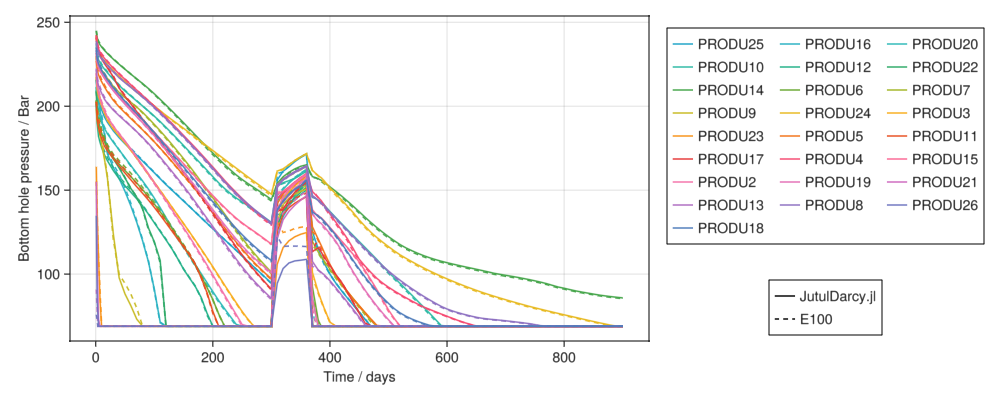

In [2]:
plot_well_comparison(:bhp, prod, "Bottom hole pressure")

## Producer water rate

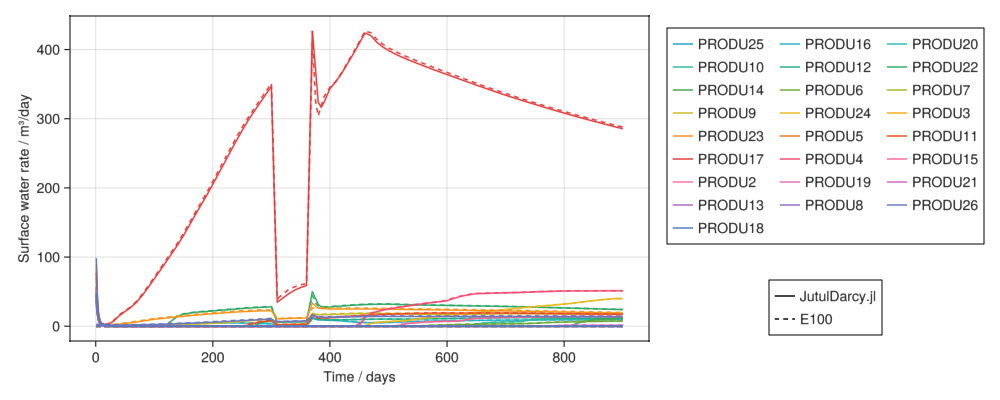

In [3]:
plot_well_comparison(:wrat, prod, "Water surface rate")

## Injector water rate

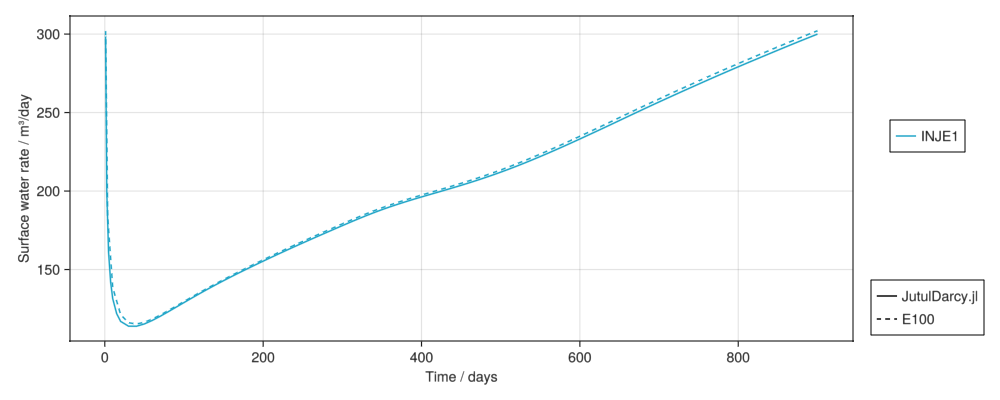

In [4]:
plot_well_comparison(:wrat, inj, "Water surface rate")

## Oil produciton rate

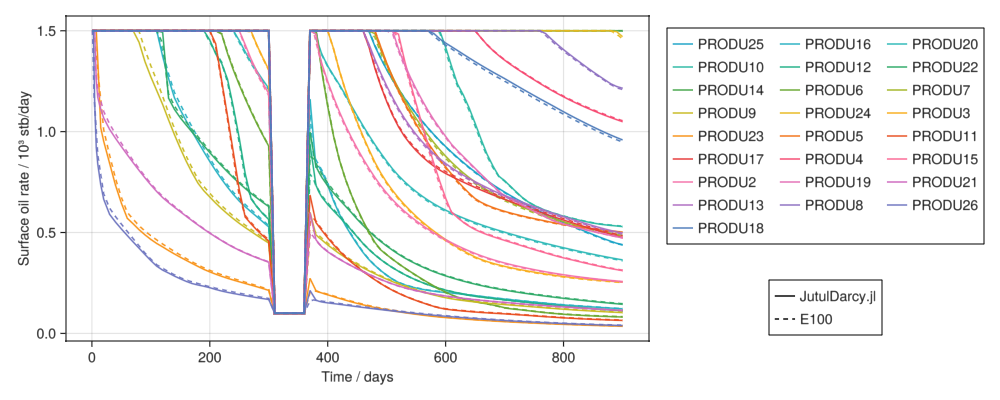

In [5]:
plot_well_comparison(:orat, prod, "Oil surface rate")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*